In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageDraw
import tkinter as tk
from tkinter import ttk
from PIL import ImageTk

# Загрузка датасета
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Предварительная обработка для CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Определение CNN модели
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Создание и обучение
cnn_model = create_cnn_model()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


c:\Users\mr.Slave\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9138 - loss: 0.3194 - val_accuracy: 0.9844 - val_loss: 0.0692
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9831 - loss: 0.0724 - val_accuracy: 0.9877 - val_loss: 0.0547
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0544 - val_accuracy: 0.9882 - val_loss: 0.0515
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9908 - loss: 0.0415 - val_accuracy: 0.9896 - val_loss: 0.0421
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9920 - loss: 0.0339 - val_accuracy: 0.9906 - val_loss: 0.0389


In [15]:
#Распознание символа
def predict_digit(img_array):
    img_reshaped = img_array.reshape(28, 28, 1)  
    img_reshaped = np.expand_dims(img_reshaped, axis=0)  
    predictions = cnn_model.predict(img_reshaped)  
    predicted_digit_cnn = np.argmax(predictions)  
    confidence_score = predictions[0][predicted_digit_cnn] * 100  #
    return predicted_digit_cnn, confidence_score

width = 200
height = 200
bg = (0, 0, 0)

master = tk.Tk()

output_image = Image.new("RGB", (width, height), bg)
draw = ImageDraw.Draw(output_image)
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    draw.line([x1, y1, x2, y2], fill="white", width=7)
    canvas.create_line(x1, y1, x2, y2, fill="white", width=7)
    master.update_idletasks()

def clear_canvas():
    canvas.create_rectangle(0, 0, 200, 200, fill="black")

#Сохранение изображения и определение
def save_and_predict():
    output_image.save("drawn_image.png")
    img = Image.open("drawn_image.png")
    img = img.resize((28, 28))
    img = img.convert('L')
    img_array = np.array(img) / 255.0
    predicted_digit = predict_digit(img_array)
    print("Распознованный символ (CNN):", predicted_digit)

canvas = tk.Canvas(master, width=width, height=height, bg='white')
canvas.pack()

tk_img = ImageTk.PhotoImage(output_image)
canvas.create_image(0, 0, image=tk_img, anchor=tk.NW)

master.bind("<B1-Motion>", paint)

predict_button = tk.Button(master, text="Распознать символ", command=save_and_predict)
predict_button.pack()


master.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Распознованный символ (CNN): (9, 61.25296950340271)


Архитектура свёрточной нейронной сети (CNN) состоит из следующих слоёв:

1. **Входной слой**:
   - **Conv2D**: Слой свёртки с 32 фильтрами размером 3x3 и функцией активации ReLU. Этот слой принимает входные изображения размером 28x28 пикселей с одним каналом (чёрно-белые).
   
2. **Слой пулинга**:
   - **MaxPooling2D**: Слой пулинга с окном 2x2, который сокращает размерность пространственных данных, уменьшая размеры полученных карт признаков вдвое.

3. **Второй свёрточный слой**:
   - **Conv2D**: Ещё один слой свёртки, на этот раз с 64 фильтрами размером 3x3 и функцией активации ReLU. К этому слою также применяется регуляризация L2 для уменьшения переобучения.
   
4. **Второй слой пулинга**:
   - **MaxPooling2D**: Аналогичный первому слой пулинга, который дополнительно уменьшает размерность данных.

5. **Слой выравнивания**:
   - **Flatten**: Преобразует многомерные карты признаков в одномерный вектор. Это необходимо для того, чтобы данные могли быть обработаны полносвязными слоями.

6. **Полносвязные слои**:
   - **Dense**: Первый полносвязный слой с 128 нейронами и функцией активации ReLU.
   - **Dense**: Второй полносвязный слой, который является выходным слоем сети, содержит 10 нейронов (по одному для каждой цифры от 0 до 9) с функцией активации softmax для классификации.

### Компиляция модели:
- **Оптимизатор**: Adam с скоростью обучения 0.001.
- **Функция потерь**: Категориальная кроссэнтропия, которая часто используется для задач многоклассовой классификации.
- **Метрики**: Точность (accuracy), позволяющая оценить долю правильно классифицированных изображений.


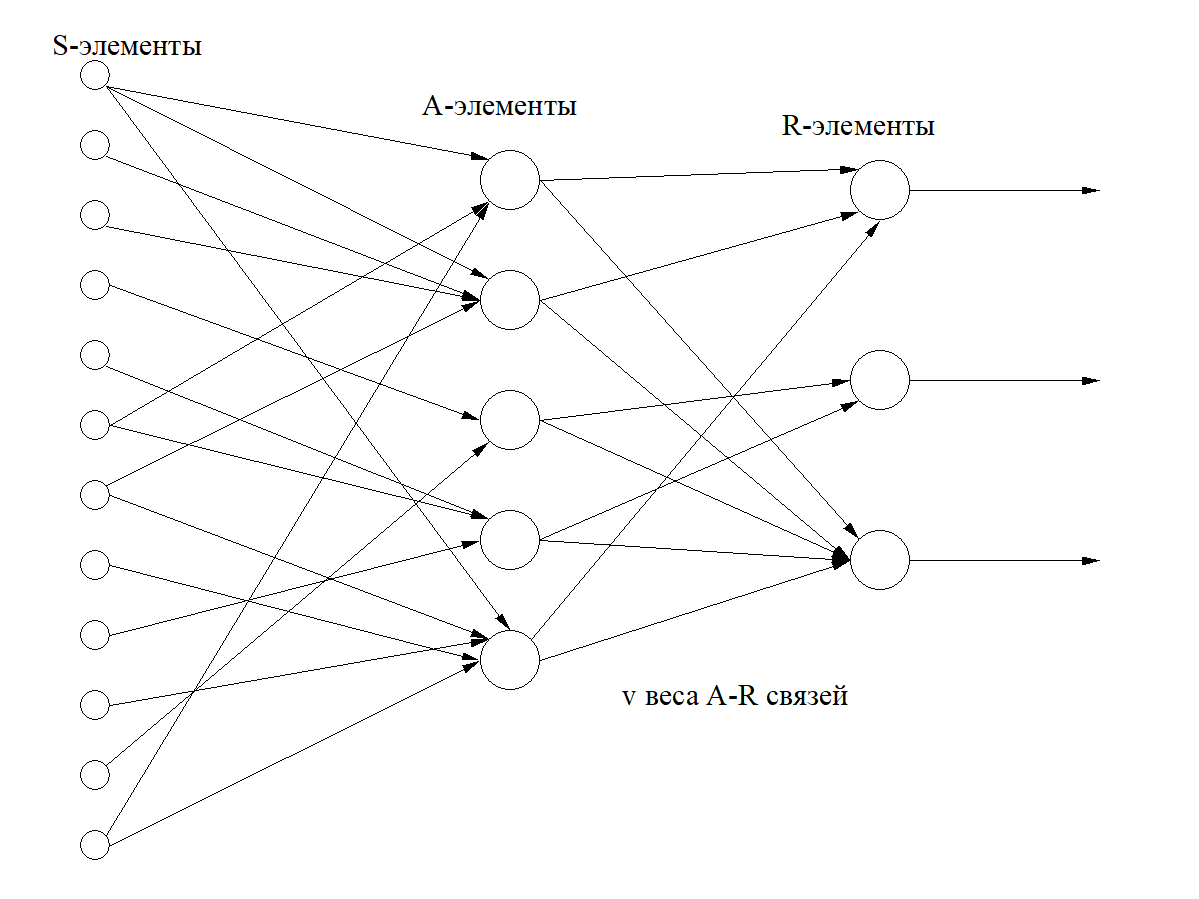


### Многослойный перцептрон (MLP)

**Многослойный перцептрон (MLP)** — это тип искусственной нейронной сети, который состоит из нескольких слоев искусственных нейронов и используется для решения сложных задач классификации и регрессии. Основные компоненты MLP:

1. **Входной слой**: Первый слой, в который поступают входные данные.
2. **Скрытые слои**: Один или несколько слоев между входным и выходным слоями, содержащие нейроны, которые обрабатывают входные данные.
3. **Выходной слой**: Последний слой, который производит окончательный результат.

#### Структура:
- Каждый нейрон в MLP связан с каждым нейроном предыдущего и последующего слоя.
- Каждый нейрон имеет свои веса и смещение (bias).
- Для активации нейрона применяется нелинейная функция активации (ReLU, сигмоидная, гиперболический тангенс и т. д.).

#### Обучение:
- MLP обучается посредством обратного распространения ошибки (backpropagation), чтобы минимизировать разницу между предсказанными и реальными значениями.
- Используется оптимизационный алгоритм, например, градиентный спуск.

### Перцептрон

**Перцептрон** — это тип искусственного нейрона или классическая модель искусственной нейронной сети, предложенная Фрэнком Розенблаттом в 1957 году. Основные характеристики:

- **Однослойный перцептрон**: Состоит из одного слоя нейронов.
- **Обучение**: Использует линейную функцию активации и обучается с помощью алгоритма коррекции весов (весы обновляются в зависимости от ошибки классификации).
- **Ограничения**: Способен решать только линейно разделимые задачи.

### Различие между перцептроном и нейроном

- **Нейрон** — элементарный блок любой нейронной сети, в том числе перцептрона.
- **Перцептрон** — это модель однослойной или многослойной нейронной сети, где каждый нейрон принимает решение на основе линейной комбинации входов и функции активации.

### Отличие теории Румельхарта от Розенблатта

1. **Теория Розенблатта**:
   - Разработал перцептрон, который был способен решать только линейно разделимые задачи.
   - Однослойный перцептрон не мог справляться с задачами, которые не были линейно разделимы, например, с проблемой XOR.

2. **Теория Румельхарта**:
   - В 1986 году Дэвид Румельхарт вместе с коллегами предложил метод обратного распространения ошибки (backpropagation) для обучения многослойных перцептронов.
   - Позволил решать нелинейные задачи и значительно расширил возможности искусственных нейронных сетей.
   - Использование нелинейной функции активации в скрытых слоях позволило моделировать сложные зависимости.

### Основные различия:

- **Структура сети**:
  - Розенблатт: Однослойный перцептрон.
  - Румельхарт: Многослойный перцептрон (MLP).

- **Алгоритм обучения**:
  - Розенблатт: Коррекция весов на основе ошибки классификации.
  - Румельхарт: Обратное распространение ошибки (backpropagation).

- **Функция активации**:
  - Розенблатт: Линейная функция активации.
  - Румельхарт: Нелинейные функции активации.

Таким образом, теория Румельхарта значительно расширила возможности искусственных нейронных сетей, позволив им решать более сложные задачи.